# Тюнинг линейной регрессии и ошибки

### О задании

В этом задании вы:
- обучите линейную регрессию, познакомитесь с метриками качества в задачах регресии

In [1]:
import matplotlib

%pylab inline
%matplotlib inline
import pandas as pd

from sklearn.base import BaseEstimator
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Часть 1. Линейная регрессия

Для начала загрузим данные и разделим их на обучающую и тестовую выборки в соотношении 7 к 3. Зачем так делать? Когда вы проверяете себя на данных на которых не обучались, вы можете быть уверены что не переобучились. Таким образом если качество на 70% датасета (обучающей выборке) растёт, а на тестовой выборке падает, то модель начала запоминать датасет (переобучилась), вы что-то делаете не так.


In [2]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)

__Задание 1.__ Обучение линейной регрессии.

**(4 балла)**

Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$).

In [3]:
from sklearn import datasets, linear_model
from sklearn.linear_model import Ridge, Lasso
import matplotlib.pyplot as plt
import numpy as np

[0.001, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009000000000000001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]


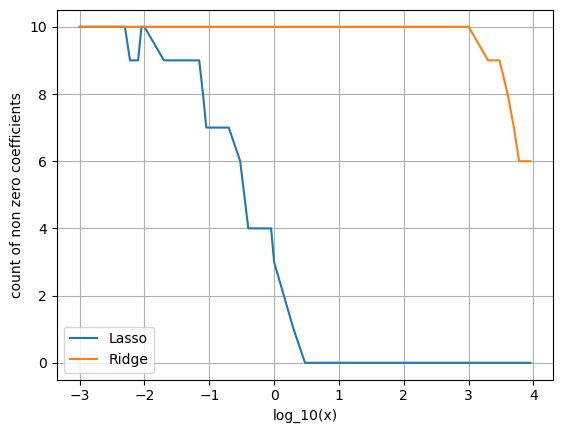

In [4]:
eps = 0.05

def near_to_zero(x):
    return abs(x) < eps

def get_rng():
    rng = []
    rng.append(0.001)
    
    for i in range(-3, 4, 1):
        for j in range(1, 10):
            rng.append((10 ** i) * j)

    return rng

rng = get_rng()
print(rng)

lasso_zero = []
ridge_zero = []

for Alpha in rng:
    lasso = Lasso(alpha = Alpha)
    ridge = Ridge(alpha = Alpha)

    lasso.fit(X_train, y_train)
    ridge.fit(X_train, y_train)

    lasso_zero.append(len(lasso.coef_))
    ridge_zero.append(len(ridge.coef_))
    
    for w in lasso.coef_:
        lasso_zero[-1] -= near_to_zero(w)
    
    for w in ridge.coef_:
        ridge_zero[-1] -= near_to_zero(w)
        
plt.plot(np.log10(rng), lasso_zero, label="Lasso")
plt.plot(np.log10(rng), ridge_zero, label="Ridge")
plt.xlabel('log_10(x)')
plt.ylabel('count of non zero coefficients')

plt.grid(True)
plt.legend()
plt.show()

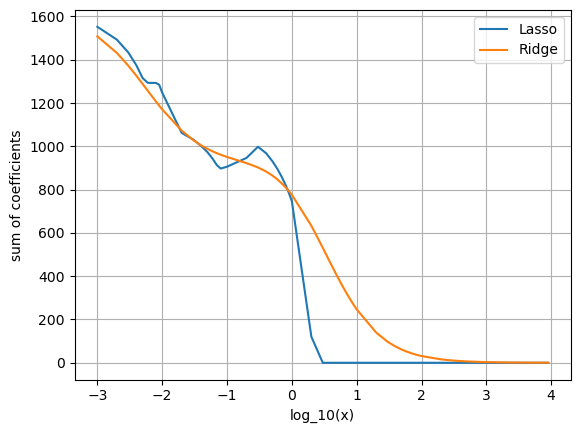

In [5]:
ridge_sum = []
lasso_sum = []


for Alpha in rng:
    ridge = Ridge(alpha = Alpha)
    lasso = Lasso(alpha = Alpha)
    
    ridge.fit(X_train, y_train)
    lasso.fit(X_train, y_train)
    
    ridge_sum.append(sum(ridge.coef_))
    lasso_sum.append(sum(lasso.coef_))
    
plt.plot(np.log10(rng), lasso_sum, label="Lasso")
plt.plot(np.log10(rng), ridge_sum, label="Ridge")
plt.xlabel('log_10(x)')
plt.ylabel('sum of coefficients')

plt.grid(True)
plt.legend()
plt.show()

Как можно заметить, Lasso гораздо быстрее зануляет свои коэффиценты. Также как только alpha становится больше 1 сумма коэффицентов у lasso очень быстро становится равна 0, в отличие от ridge.

Посмотрим на зануление коэффицентов ridge при разных epsilon.

[0.01, 0.1, 1, 10, 100]


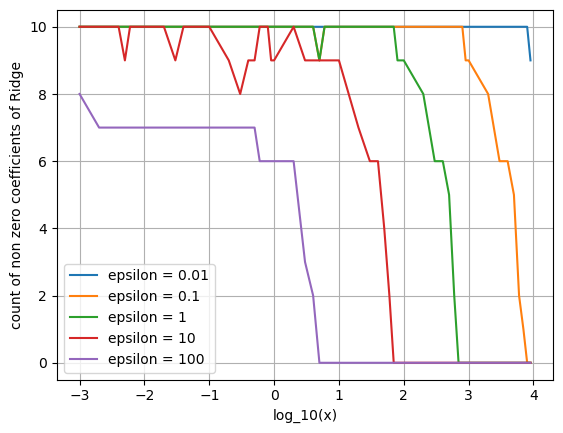

In [6]:
eps = [(10 ** i) * 1 for i in range(-2, 3)]

print(eps)

rng = get_rng()

def near_to_zero(x, epsilon):
    return abs(x) < epsilon

for epsilon in eps:
    
    zero = []
    
    for Alpha in rng:
        ridge = Ridge(alpha = Alpha)

        ridge.fit(X_train, y_train)

        zero.append(len(ridge.coef_))

        for w in ridge.coef_:
            zero[-1] -= near_to_zero(w, epsilon)
        
    plt.plot(np.log10(rng), zero, label=f"epsilon = {epsilon}")
plt.xlabel('log_10(x)')
plt.ylabel('count of non zero coefficients of Ridge')
plt.grid(True)
plt.legend()
plt.show()

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [7]:
# import sklearn.cross_validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression

In [8]:
ridge = Ridge()
regression = LinearRegression()

ridge.fit(X_train, y_train)
regression.fit(X_train, y_train)

print(cross_val_score(ridge, X_train, y_train, scoring="neg_mean_squared_error"))
print(cross_val_score(ridge, X_train, y_train, scoring="neg_mean_absolute_error"))
print(cross_val_score(ridge, X_train, y_train, scoring="r2"))

[-3158.9113319  -4318.00364201 -3846.39918619 -3350.45239854
 -3340.54495003]
[-46.80923385 -55.95325998 -52.57050113 -45.91132985 -49.1838008 ]
[0.44115943 0.38256428 0.41210964 0.34974655 0.48232254]


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

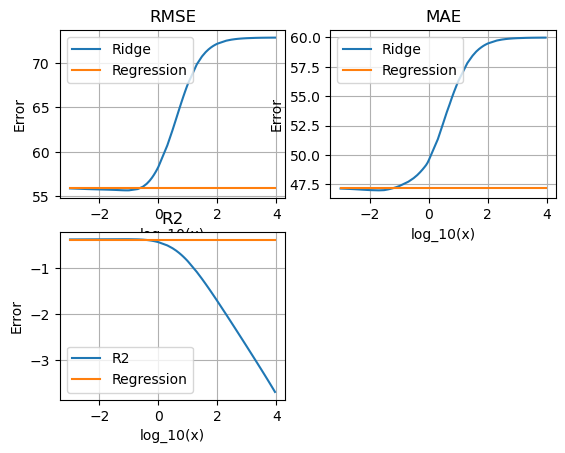

In [14]:
import sklearn

rng = get_rng()

rmse_ridge = []
mae_ridge = []
r2_ridge = []
   
rmse_reg = []
mae_reg = []
r2_reg = []

for Alpha in rng:
    ridge = Ridge(alpha=Alpha)
    
    ridge.fit(X_train, y_train)
    y_predict = ridge.predict(X_test)
    y_regression = regression.predict(X_test)
    
    rmse_ridge.append(sklearn.metrics.mean_squared_error(y_test, y_predict, squared=False))
    mae_ridge.append(sklearn.metrics.mean_absolute_error(y_test, y_predict))
    r2_ridge.append(sklearn.metrics.r2_score(y_test, y_predict))
    
    rmse_reg.append(sklearn.metrics.mean_squared_error(y_test, y_regression, squared=False))
    mae_reg.append(sklearn.metrics.mean_absolute_error(y_test, y_regression))
    r2_reg.append(sklearn.metrics.r2_score(y_test, y_regression))
    
#RMSE
sp = plt.subplot(221)
plt.plot(np.log10(rng), rmse_ridge, label="Ridge")
plt.plot(np.log10(rng), rmse_reg, label="Regression")
plt.xlabel('log_10(x)')
plt.ylabel('Error')
plt.title("RMSE")
plt.grid(True)
plt.legend()

#MAE

sp = plt.subplot(222)
plt.plot(np.log10(rng), mae_ridge, label="Ridge")
plt.plot(np.log10(rng), mae_reg, label="Regression")
plt.xlabel('log_10(x)')
plt.ylabel('Error')
plt.title("MAE")
plt.grid(True)
plt.legend()

# print(np.log10(abs(np.array(r2_mean))))


#R2
sp = plt.subplot(223)
plt.plot(np.log10(rng), np.log10(abs(np.array(r2_ridge))), label="R2")
plt.plot(np.log10(rng), np.log10(abs(np.array(r2_reg))), label="Regression")
plt.xlabel('log_10(x)')
plt.ylabel('Error')
plt.title("R2")
plt.grid(True)
plt.legend()
plt.show()

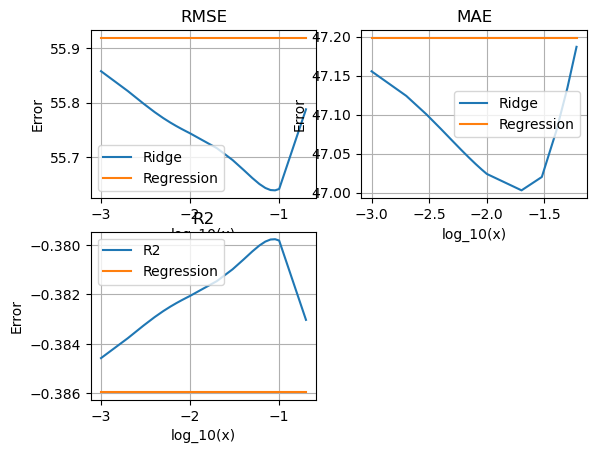

In [19]:
import sklearn

rng = get_rng()

rmse_ridge = []
mae_ridge = []
r2_ridge = []
   
rmse_reg = []
mae_reg = []
r2_reg = []

A = []
B = []
C = []

for Alpha in rng:
    ridge = Ridge(alpha=Alpha)
    
    ridge.fit(X_train, y_train)
    y_predict = ridge.predict(X_test)
    y_regression = regression.predict(X_test)
    
    rmse_ridge.append(sklearn.metrics.mean_squared_error(y_test, y_predict, squared=False))
    mae_ridge.append(sklearn.metrics.mean_absolute_error(y_test, y_predict))
    r2_ridge.append(sklearn.metrics.r2_score(y_test, y_predict))
    
    rmse_reg.append(sklearn.metrics.mean_squared_error(y_test, y_regression, squared=False))
    mae_reg.append(sklearn.metrics.mean_absolute_error(y_test, y_regression))
    r2_reg.append(sklearn.metrics.r2_score(y_test, y_regression))
    
    if rmse_ridge[-1] > rmse_reg[-1]:
        rmse_ridge.pop()
        rmse_reg.pop()
    else:
        A.append(Alpha)
        
    if mae_ridge[-1] > mae_reg[-1]:
        mae_ridge.pop()
        mae_reg.pop()
    else:
        B.append(Alpha)
        
    if r2_ridge[-1] < r2_reg[-1]:
        r2_ridge.pop()
        r2_reg.pop()
    else:
        C.append(Alpha)
        
    
#RMSE
sp = plt.subplot(221)
plt.plot(np.log10(A), rmse_ridge, label="Ridge")
plt.plot(np.log10(A), rmse_reg, label="Regression")
plt.xlabel('log_10(x)')
plt.ylabel('Error')
plt.title("RMSE")
plt.grid(True)
plt.legend()

#MAE

sp = plt.subplot(222)
plt.plot(np.log10(B), mae_ridge, label="Ridge")
plt.plot(np.log10(B), mae_reg, label="Regression")
plt.xlabel('log_10(x)')
plt.ylabel('Error')
plt.title("MAE")
plt.grid(True)
plt.legend()

# print(np.log10(abs(np.array(r2_mean))))


#R2
sp = plt.subplot(223)
plt.plot(np.log10(C), np.log10(abs(np.array(r2_ridge))), label="R2")
plt.plot(np.log10(C), np.log10(abs(np.array(r2_reg))), label="Regression")
plt.xlabel('log_10(x)')
plt.ylabel('Error')
plt.title("R2")
plt.grid(True)
plt.legend()
plt.show()

Ошибка r_2 очень быстро растет (логарифмически) в сравнении с MAE и RMSE.

Ошибка у модели ridge почти всегда больше, чем у регрессии, однако бывает ситуации, когда ridge имеет меньшую ошибку чем регрессия, и ее r2_ridge > r2_regression. Как видно в ситуациях, когда ridge имеет меньшую ошибку, то разница ошибки между ridge и регрессией не очень существенна.

Ну а так кажется, что регуляризация помогает модели не переобучаться, но при этом портит среднюю ошибку.

__Задание 2.__ Поиск объектов-выбросов

**(4 балла)**

Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

<Figure size 640x480 with 0 Axes>

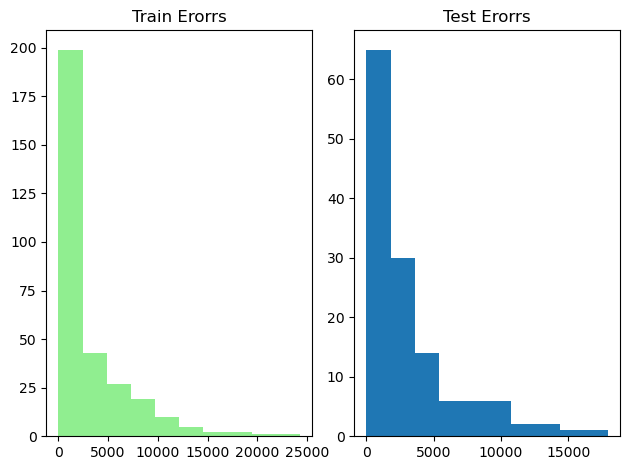

In [10]:
ridge = Ridge(alpha=0.1)
    
ridge.fit(X_train, y_train)
y_predict = ridge.predict(X_train)
y_predict_test = ridge.predict(X_test)

fig = matplotlib.pyplot.figure()
fig, axes = plt.subplots(1, 2)

ax1, ax2 = axes.flatten()


errors = ((y_predict - y_train) ** 2)
errors_test = ((y_predict_test - y_test) ** 2)

ax1.hist(errors, color="LightGreen")
ax1.set_title("Train Erorrs")

ax2.hist(errors_test)
ax2.set_title("Test Erorrs")


# errors = ((y_predict - y_train) ** 2)

# plt.show()

fig.tight_layout()
plt.show()

<i>Чем больше ошибка, тем меньше объектов с ней</i>. Это видно по гистограмме ошибок. Причем, большая часть объектов обладает не очень большой ошибкой, в сравнении с максимальной ошибкой.


Попробуйте удалить объекты-выбросы из обучающей выборки (что считать или не считать выбросами на ваше усмотрение). Обучите модель заново и посмотрите на качество на отложенной выборке (учитывайте, что там тоже могут быть выбросы, с которыми вы ничего не можете сделать). Стало ли лучше? Чем вы можете объяснить это?

Text(0.5, 1.0, 'Test Erorrs')

<Figure size 640x480 with 0 Axes>

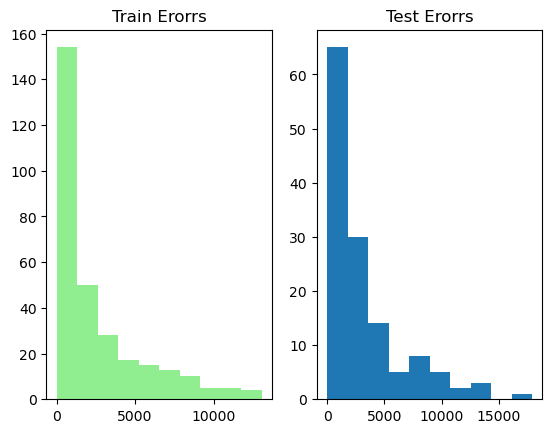

In [11]:
# Давайте считать объекты выбросами, если их ошибка >= max_error

max_error = 13000

new_X = []
new_y = []

for i in range(len(errors)):
    if errors[i] < max_error:
        # не выброс
        new_X.append(X_train[i])
        new_y.append(y_train[i])
        
# посмотрим на распределение ошибок

ridge = Ridge(alpha=0.1)
    
ridge.fit(new_X, new_y)
y_predict = ridge.predict(new_X)
y_predict_test = ridge.predict(X_test)

fig = matplotlib.pyplot.figure()
fig, axes = plt.subplots(1, 2)

ax1, ax2 = axes.flatten()

errors = ((y_predict - new_y) ** 2)
errors_test = ((y_predict_test - y_test) ** 2)

ax1.hist(errors, color="LightGreen")
ax1.set_title("Train Erorrs")

ax2.hist(errors_test)
ax2.set_title("Test Erorrs")

Значения ошибок на тестовых данных больше 15000 практически нет.
Предсказание на тестовых данных немного улучшилось путем удаления "выбросов", но не очень сильно. Улучшение качества совсем немного заметно.

Наверно, это связано с тем, что выбросы портят обучение модели, но видимо здесь выбросы не сильно "портили" статистику.

__Задание 3.__ Отчёт

**(2 балла)**

# Report


<b>Регуляризация бывает полезной</b> в тех случаях, когда мы не хотим, чтобы наша модель переобучалась. В некоторых случаях при правильно подобранном alpha (обычено значение не очень больше), ridge будет показывать результат лучше linear regression. Однако при больших значениях alpha, ошибка ridge будет существенно больше чем у регрессии. На практике модель, которая "запомнила" примеры не будет эффективной, а модель с регуляризацией будет.

Удаление выбросов может улучшить обучение модели. Но бывает такое, что выбросы указывают на feature/features, которые мы не учли. Поэтому с выбросами стоит быть аккуратней.